# Example for a beam with 2 forces

In [19]:
reset -f

In [20]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [21]:
L, F1, F2, x  = sp.symbols('L, F_1, F_2, x', real = 'True')
Ax, Ay, MAz = sp. symbols('A_x, A_y, MA_z', real = 'True')

In [22]:
eq1 = sp.Eq(0 , Ax)
eq2 = sp.Eq(0 , Ay - F1 - F2)
eq3 = sp.Eq(0, MAz - F1*L -F2*2*L)

In [23]:
sol = sp.solve([eq1, eq2, eq3],[Ax, Ay, MAz])
sol

{A_x: 0, A_y: F_1 + F_2, MA_z: F_1*L + 2*F_2*L}

In [24]:
Ax, Ay, MAz = sol.values()

# Internal force reactions

## Define symbolic functions

In [25]:
N1 = sp.Function('N_1')(x)
Q1 = sp.Function('Q_1')(x)
Mbz1 = sp.Function('Mbz_1')(x) 

N2 = sp.Function('N_2')(x)
Q2 = sp.Function('Q_2')(x)
Mbz2 = sp.Function('Mbz_2')(x) 

## Set up equations

In [26]:
eq11 = sp.Eq(0, N1 + Ax) 
eq12 = sp.Eq(0, Q1 + Ay)
eq13 = sp.Eq(0, Mbz1 + MAz - Ay*x)

eq21 = sp.Eq(0, N2 + Ax)
eq22 = sp.Eq(0, Q2 + Ay - F1)
eq23 = sp.Eq(0, Mbz2 + MAz - Ay*x + F1*(x-L))

# solve equations

In [27]:
sol = sp.solve([eq11, eq12, eq13, eq21, eq22, eq23],[N1, Q1, Mbz1, N2, Q2, Mbz2])
sol

{N_1(x): 0,
 Q_1(x): -F_1 - F_2,
 Mbz_1(x): -F_1*L + F_1*x - 2*F_2*L + F_2*x,
 N_2(x): 0,
 Q_2(x): -F_2,
 Mbz_2(x): -2*F_2*L + F_2*x}

In [28]:
N1, Q1, Mbz1, N2, Q2, Mbz2 = sol.values()

# Deformation

In [29]:
E, h, b, y = sp.symbols('E, h, b,y', real = 'True')

In [30]:
Iz = b*h**3/12

In [31]:
v1 = sp.Function('v_1')
v2 = sp.Function('v_2')

In [32]:
eq1 = sp.Eq(sp.diff(v1(x),x,x), Mbz1/(E*Iz))
eq2 = sp.Eq(sp.diff(v2(x),x,x), Mbz2/(E*Iz))
display(eq1, eq2)

Eq(Derivative(v_1(x), (x, 2)), 12*(-F_1*L + F_1*x - 2*F_2*L + F_2*x)/(E*b*h**3))

Eq(Derivative(v_2(x), (x, 2)), 12*(-2*F_2*L + F_2*x)/(E*b*h**3))

In [33]:
sol = sp.dsolve([eq1, eq2], func = [v1(x), v2(x)])
display(sol)
v11 = sol[0].rhs
v22 = sol[1].rhs
dv11 = sp.diff(v11, x)
dv22 = sp.diff(v22, x)

[Eq(v_1(x), C1 + C2*x - 6*L*x**2*(F_1 + 2*F_2)/(E*b*h**3) + 2*x**3*(F_1 + F_2)/(E*b*h**3)),
 Eq(v_2(x), C3 + C4*x - 12*F_2*L*x**2/(E*b*h**3) + 2*F_2*x**3/(E*b*h**3))]

In [34]:
bc1 = sp.Eq(0, v11.subs(x,0))
bc2 = sp.Eq(0, dv11.subs(x,0))
bc3 = sp.Eq(0, v11.subs(x,L) - v22.subs(x,L))
bc4 = sp.Eq(0, dv11.subs(x,L) - dv22.subs(x,L))

In [35]:
sol = sp.solve([bc1, bc2, bc3, bc4], ['C1', 'C2', 'C3', 'C4'])
C1, C2, C3, C4 = sol.values()
v11 = v11.subs([('C1', C1), ('C2', C2)])
v22 = v22.subs([('C3', C3), ('C4', C4)])
display(sp.simplify(v11), sp.simplify(v22))

2*x**2*(-3*L*(F_1 + 2*F_2) + x*(F_1 + F_2))/(E*b*h**3)

2*(F_1*L**3 - 3*F_1*L**2*x - 6*F_2*L*x**2 + F_2*x**3)/(E*b*h**3)

In [36]:
v11 = v11.subs([(L, 100), (h, 2), (b, 15), (E, 210000)])
v22 = v22.subs([(L, 100), (h, 2), (b, 15), (E, 210000)])


In [37]:
v_fun1 = sp.lambdify((x ,F1, F2), v11, 'numpy')
v_fun2 = sp.lambdify((x ,F1, F2), v22, 'numpy')
s1 = np.arange(0,100,1)
s2 = np.arange(100,200,1)

Text(0, 0.5, 'v(x)')

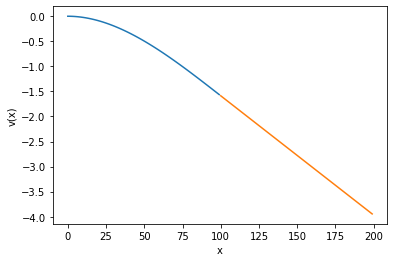

In [39]:
plt.plot(s1, v_fun1(s1, 10, 0))
plt.plot(s2, v_fun2(s2, 10, 0))
plt.xlabel('x')
plt.ylabel('v(x)')

In [192]:
[s1[:], s2[:]]

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 1